<a href="https://colab.research.google.com/github/PabloLBandeira/biblioteca-Pandas/blob/main/Desafio07_Pablo_Bandeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS
Import de libs e base

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, f1_score, roc_auc_score






In [6]:
df = pd.read_csv('/content/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3.0,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1.0,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1.0,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2.0,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3.0,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


# Análise exploratória
Verficação do DF, nomenclatura das colunas, tipo dos dados, nulos e duplicados.

In [7]:
df.describe()

,Time_on_platform,Devices_connected,Num_active_profiles,Avg_rating,Churned
count,24836.000000,23136.000000,34226.000000,26611.000000,26799.000000
mean,4393.134241,2.988184,2.994682,2.997780,0.242621
std,2524.865997,1.416144,1.413129,1.151161,0.428676
min,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2217.000000,2.000000,2.000000,1.990000,0.000000
50%,4397.000000,3.000000,3.000000,3.010000,0.000000
75%,6573.000000,4.000000,4.000000,3.990000,0.000000
max,8759.000000,5.000000,5.000000,5.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     29250 non-null  object 
 1   Gender                  27881 non-null  object 
 2   Time_on_platform        24836 non-null  float64
 3   Devices_connected       23136 non-null  float64
 4   Subscription_type       23108 non-null  object 
 5   Num_streaming_services  4242 non-null   object 
 6   Num_active_profiles     34226 non-null  float64
 7   Avg_rating              26611 non-null  float64
 8   Churned                 26799 non-null  float64
 9   User_id                 34226 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.6+ MB


In [12]:
df.isnull().sum()

Age                        4978
Gender                     6347
Time_on_platform           9392
Devices_connected         11092
Subscription_type         11120
Num_streaming_services    29986
Num_active_profiles           2
Avg_rating                 7617
Churned                    7429
User_id                       2
dtype: int64

In [15]:
#escolhas das colunas para o plot dos gráficos
X = df.drop(columns=['Churned', 'User_id'])
y = df['Churned']

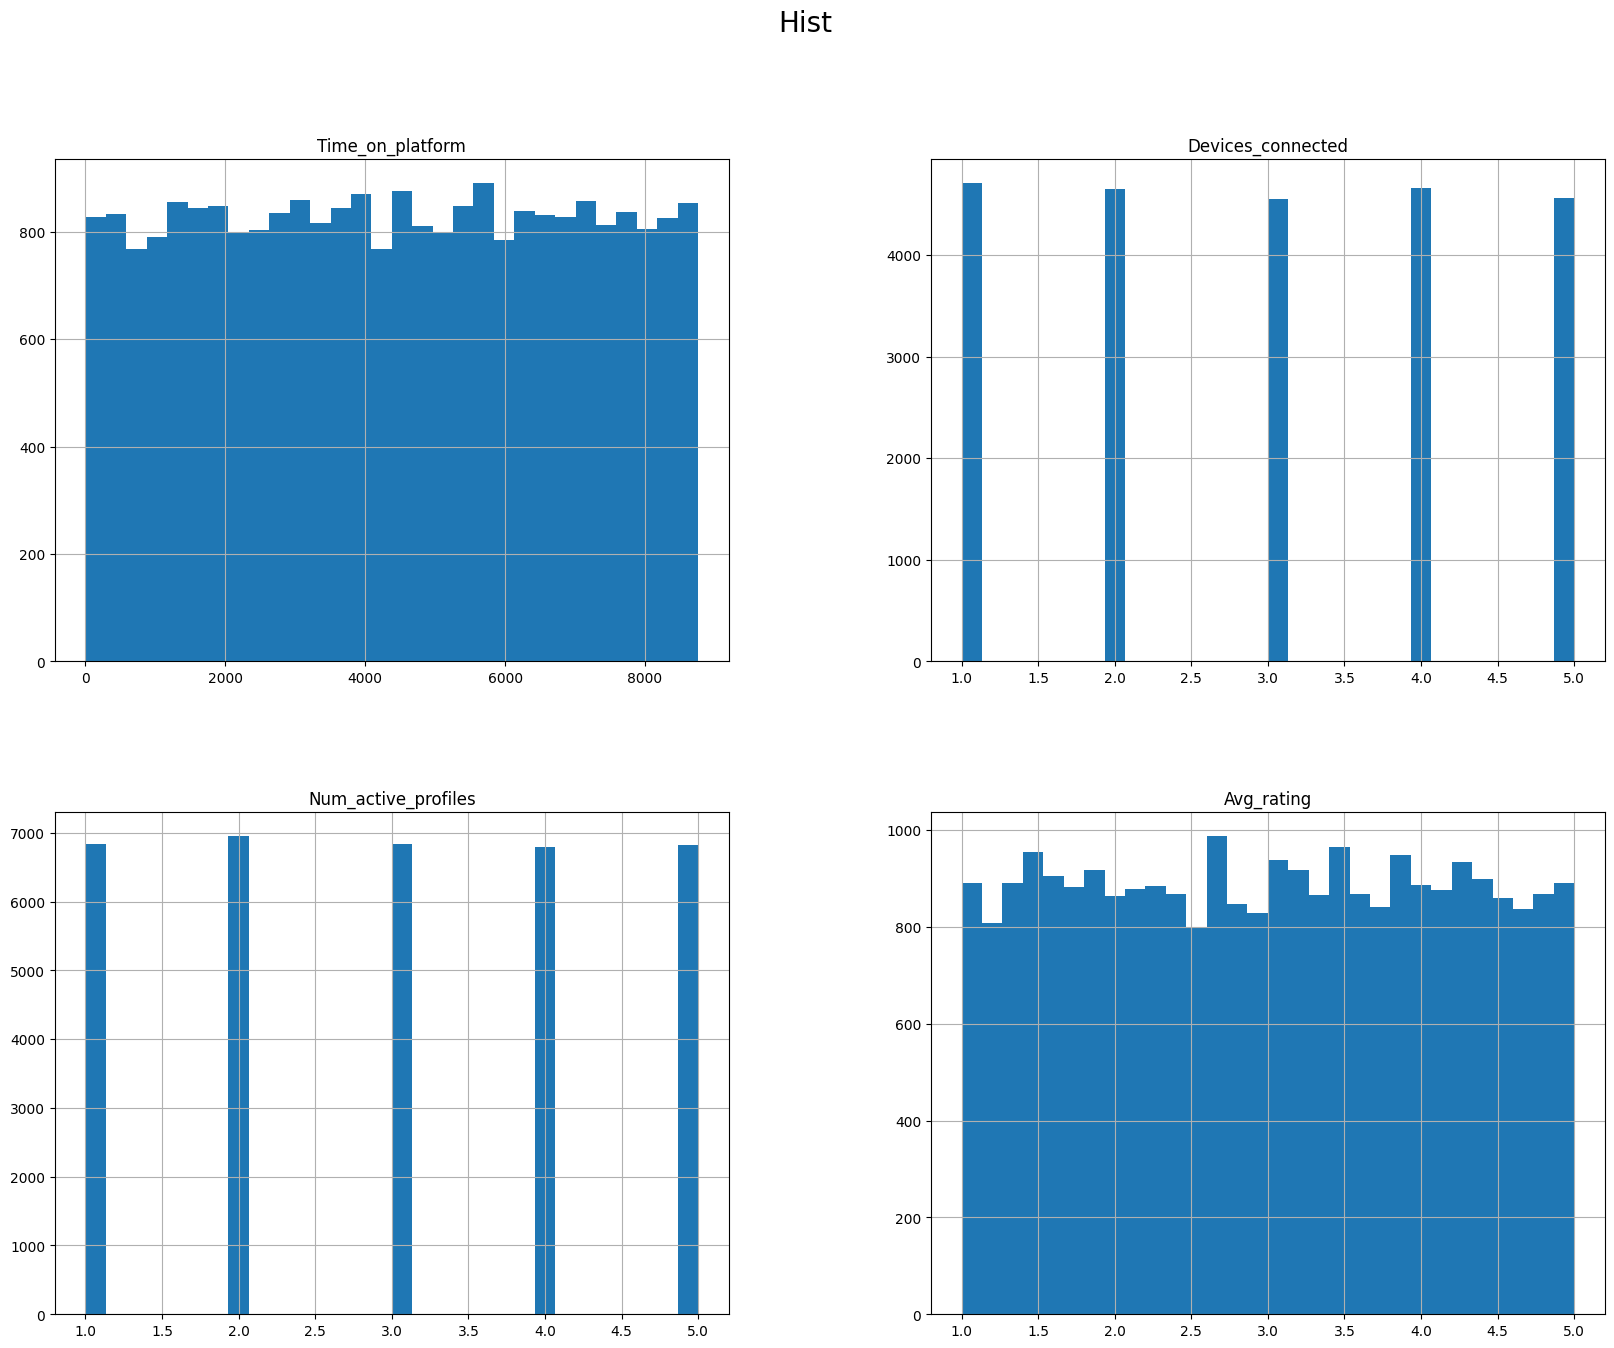

In [20]:
#histograma
X.hist(bins=30, figsize=(20, 15))
plt.suptitle('Hist', fontsize=20)
plt.show()

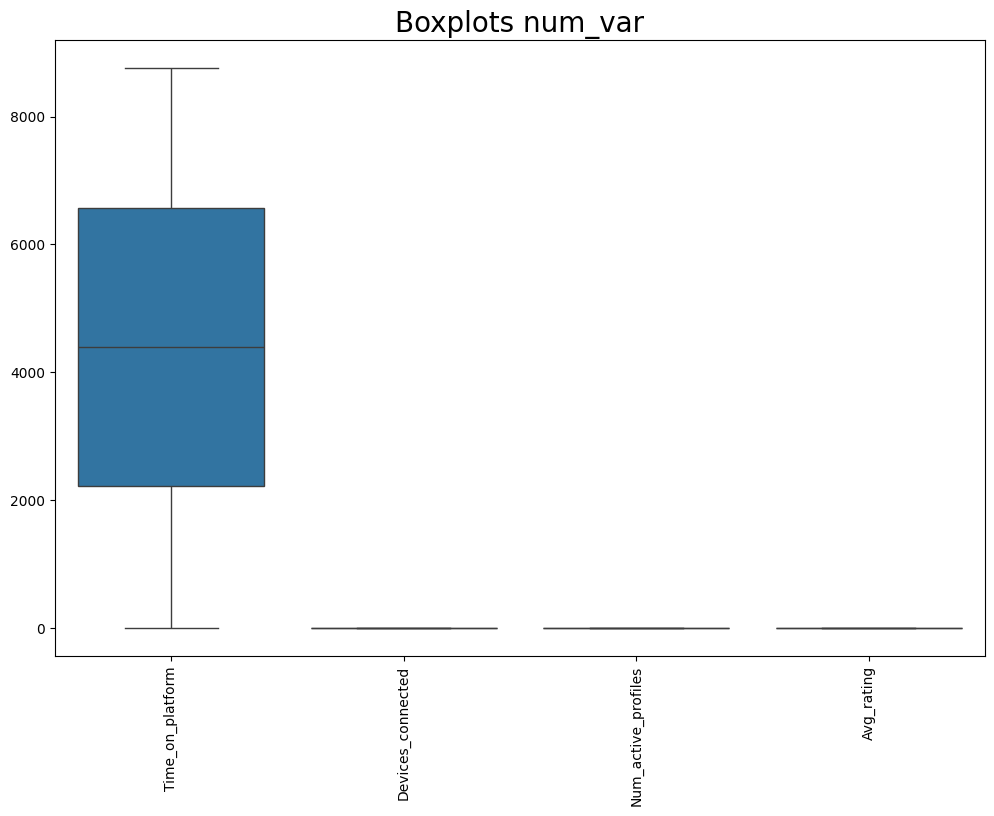

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X.select_dtypes(include='number'))
plt.title('Boxplots num_var', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Tratamento dos dados
substituição do nulos por 0, exclusão de linhas inválidas e drops necessários para a classificação.

In [31]:
#substituir nulos
sem_nulos = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[sem_nulos] = df[sem_nulos].fillna(0)

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [32]:
#drop de linhas nulas

df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [33]:
# churn  0 e 1 para NO e YES

df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [34]:
#converter float para inteiros

cols = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']
df[cols] = df[cols].astype(int)

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


# Modelagem dos dados REGRESSÃO LOGÍSTICA
criação das variáveis, separação das bases de treino e teste, fit do modelo, matrix confusão e resultados.

In [35]:
#defeinição das variáveis

X = df.drop(columns=['Churned', 'User_id'])
y = df['Churned']

In [36]:
#var categóricas em numéricas

X = pd.get_dummies(X, drop_first=True)


In [37]:
#separação das bases de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
#escalonar os dados

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
#treinamento do modelo

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
#teste do modelo
y_pred = model.predict(X_test)

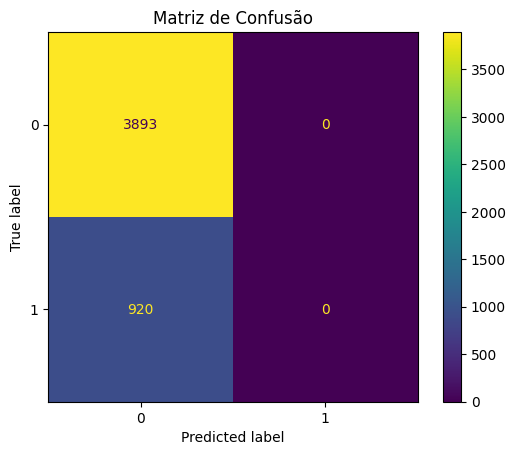

In [47]:
#matrix confusão

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

In [117]:
#calculo das métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Convert 'Yes' and 'No' to 1 and 0 respectively in y_test
y_test_numeric = y_test.replace({'Yes': 1, 'No': 0})

recall = recall_score(y_test_numeric, y_pred, pos_label=1) # Use numeric pos_label
f1 = f1_score(y_test_numeric, y_pred, pos_label=1)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
roc_auc = roc_auc_score(y_test_numeric, y_prob) # Use the numerically encoded y_test

In [119]:
#print das métricas
print(f"Acurácia: {accuracy:.2f}")
print('-------------------------')
print(f"Acurácia Balanceada: {balanced_accuracy:.2f}")
print('-------------------------')
print(f"Recall: {recall:.2f}")
print('-------------------------')
print(f"F1 Score: {f1:.2f}")
print('-------------------------')
print(f"ROC AUC: {roc_auc:.2f}")

Acurácia: 0.81
-------------------------
Acurácia Balanceada: 0.50
-------------------------
Recall: 0.00
-------------------------
F1 Score: 0.00
-------------------------
ROC AUC: 0.51


# Tunnig da regressão logística

In [94]:
#parâmetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [95]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [96]:
tuning = grid_search.best_estimator_


In [97]:
#previsões
y_pred = best_model.predict(X_test)

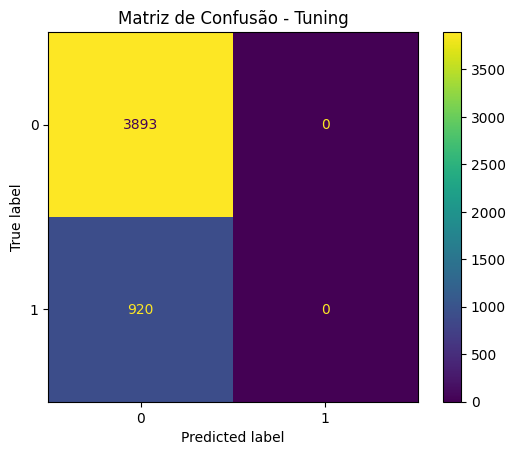

In [98]:
#matrix confusão
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Matriz de Confusão - Tuning')
plt.show()

In [126]:
#predições
y_pred_log_tune = tuning.predict(X_test)

# Calcular as métricas
accuracy_logist_tunin = accuracy_score(y_test, y_pred_log_tune)
balanced_accuracy_logist_tunin = balanced_accuracy_score(y_test, y_pred_log_tune)

# Convert y_test to numerical labels
y_test_numeric = y_test.replace({'Yes': 1, 'No': 0})

recall_logist_tunin = recall_score(y_test_numeric, y_pred_log_tune)
f1_logist_tunin = f1_score(y_test_numeric, y_pred_log_tune)
y_prob_logist_tunin = tuning.predict_proba(X_test)[:, 1]
roc_auc_logist_tunin = roc_auc_score(y_test_numeric, y_prob)

In [127]:
#print das métricas
print(f"Acurácia: {accuracy_logist_tunin:.2f}")
print('-------------------------')
print(f"Acurácia Balanceada: {balanced_accuracy_logist_tunin:.2f}")
print('-------------------------')
print(f"Recall: {recall_logist_tunin:.2f}")
print('-------------------------')
print(f"F1 Score: {f1_logist_tunin:.2f}")
print('-------------------------')
print(f"ROC AUC: {roc_auc_logist_tunin:.2f}")

Acurácia: 0.81
-------------------------
Acurácia Balanceada: 0.50
-------------------------
Recall: 0.00
-------------------------
F1 Score: 0.00
-------------------------
ROC AUC: 0.51


# Random Forest


In [90]:
#definição das variáveis

X = df.drop(columns=['Churned', 'User_id'])
y = df['Churned'].apply(lambda x: 1 if x == 'Yes' else 0)

In [91]:
#tranformação das var categóricas em numéricas

X = pd.get_dummies(X, drop_first=True)

In [92]:
#separação das bases de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
#escalonação dos dados

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

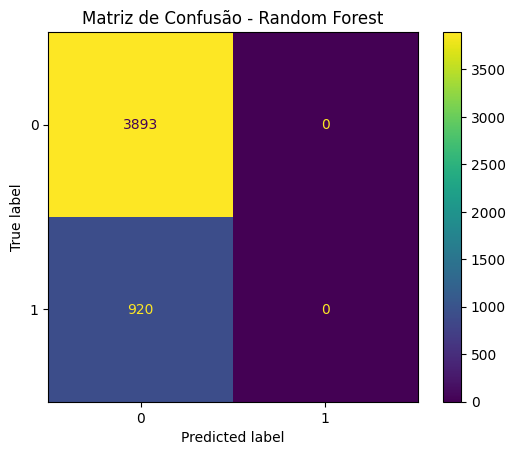

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Matriz de Confusão - Random Forest')
plt.show()

In [129]:
#cálculo das métricas
accuracy_random = accuracy_score(y_test, y_pred)
balanced_accuracy_random = balanced_accuracy_score(y_test, y_pred)
recall_random = recall_score(y_test, y_pred)
f1_random = f1_score(y_test, y_pred)
roc_auc_random = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

In [130]:
#print das métricas
print(f"Acurácia: {accuracy_random:.2f}")
print('-------------------------')
print(f"Acurácia Balanceada: {balanced_accuracy_random:.2f}")
print('-------------------------')
print(f"Recall: {recall_random:.2f}")
print('-------------------------')
print(f"F1 Score: {f1_random:.2f}")
print('-------------------------')
print(f"ROC AUC: {roc_auc_random:.2f}")

Acurácia: 0.81
-------------------------
Acurácia Balanceada: 0.50
-------------------------
Recall: 0.00
-------------------------
F1 Score: 0.00
-------------------------
ROC AUC: 0.50


# Tunnning do Random Foreste

In [101]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [103]:
y_pred = best_model.predict(X_test)

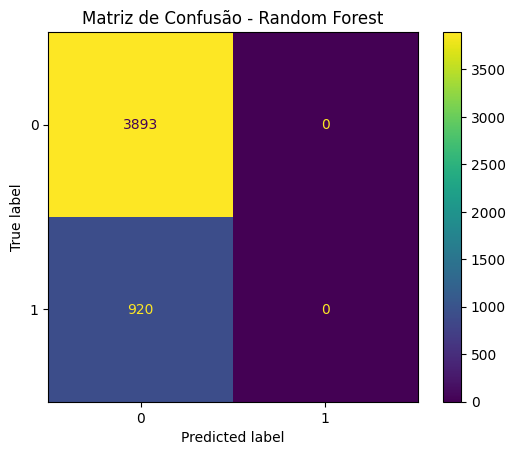

In [104]:
best_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix= best_matrix).plot()
plt.title('Matriz de Confusão - Random Forest')
plt.show()

In [132]:
# Calcular as métricas
accuracy_random_tunin = accuracy_score(y_test, y_pred)
balanced_accuracy_random_tunin = balanced_accuracy_score(y_test, y_pred)
recall_random_tunin = recall_score(y_test, y_pred)
f1_random_tunin = f1_score(y_test, y_pred)
roc_auc_random_tunin = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

In [133]:
#print das métricas
print(f"Acurácia: {accuracy_random_tunin:.2f}")
print('-------------------------')
print(f"Acurácia Balanceada: {balanced_accuracy_random_tunin:.2f}")
print('-------------------------')
print(f"Recall: {recall_random_tunin:.2f}")
print('-------------------------')
print(f"F1 Score: {f1_random_tunin:.2f}")
print('-------------------------')
print(f"ROC AUC: {roc_auc_random_tunin:.2f}")

Acurácia: 0.81
-------------------------
Acurácia Balanceada: 0.50
-------------------------
Recall: 0.00
-------------------------
F1 Score: 0.00
-------------------------
ROC AUC: 0.50
